In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv('data/train.csv')
X_test_raw = pd.read_csv('data/test.csv')
Y_test_raw = pd.read_csv('data/gender_submission.csv')
titanic_test = pd.merge(left=X_test_raw, right=Y_test_raw)

In [3]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_train['Cabin'].isna().sum()

687

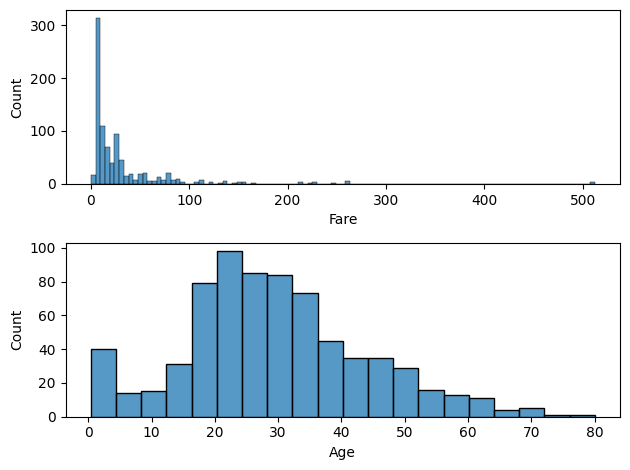

In [19]:
fig, axes = plt.subplots(2)
sns.histplot(titanic_train['Fare'], ax=axes[0]), sns.histplot(titanic_train['Age'], ax=axes[1])
plt.tight_layout()

#### підготовка даних

In [21]:
def clean_features(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    df = df.dropna()

    # apply binary encoding to Sex column
    df['Sex'] = df['Sex'].apply(lambda x: 0 if x=='male' else 1)
    
    # apply one-hot encoding to Embarked column
    onehot_embarked = OneHotEncoder()
    classes_embarked = onehot_embarked.fit_transform(df[['Embarked']])
    df[onehot_embarked.get_feature_names_out()] = classes_embarked.toarray()
    df = df.drop('Embarked', axis=1)

    # normalize the data
    cols_to_scale_std = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
    std_scaler = MinMaxScaler().fit(df[cols_to_scale_std])
    df_scaled = std_scaler.transform(df[cols_to_scale_std])
    df[cols_to_scale_std] = df_scaled

    # split it into X and Y
    try:
        X = df.drop('Survived', axis=1)
        Y = df['Survived']
    except KeyError:
        X = df
        Y = None

    return X, Y

In [22]:
X_train, Y_train = clean_features(titanic_train)

In [23]:
X_test, Y_test = clean_features(titanic_test)

In [24]:
X_train.to_csv('data/X_train.csv'); Y_train.to_csv('data/Y_train.csv')
X_test.to_csv('data/X_test.csv'); Y_test.to_csv('data/Y_test.csv')

померлих на 47% більше, тобто може потрібно урівняти класи

In [25]:
Y_train.value_counts()[0] / Y_train.value_counts()[1]

1.4722222222222223

In [32]:
y = np.array([0,0,0,1,0,1])
y_hat = np.array([0,0,0,0,0,1])
np.where(y != y_hat)[0]

array([3], dtype=int64)

In [33]:
X_test_raw.shape

(418, 11)

In [34]:
X_test_raw.dropna().shape

(87, 11)